In [3]:
#1.Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 2. Load data

In [3]:
data = pd.read_csv('/Users/eru/AI.2021/Countries-exercise.csv')
data.head(20)


,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
5,Aland,19.953288,60.214887
6,Andorra,1.560544,42.542291
7,United Arab Emirates,54.300167,23.905282
8,Argentina,-65.179807,-35.381349
9,Armenia,44.929933,40.289526


In [6]:
data.shape

(241, 3)

In [4]:
X = data.iloc[:, 1:3]
X

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


In [5]:
X.shape

(241, 2)

In [8]:
X = np.array(X)

In [27]:
X.shape

(241, 2)

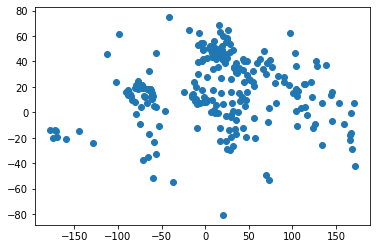

In [30]:
plt.scatter(X[:,0], X[:,1])

In [29]:
# 3 Choose K centroids

In [11]:
def initialize_K_centroids(X, K):
    m,n = X.shape
    k_rand = np.ones((K, n))
    k_rand = X[np.random.choice(range(len(X)), K, replace=False),:]
    return k_rand

In [12]:
centroids_init = initialize_K_centroids(X, 4)

In [13]:
centroids_init

array([[-85.0305297 ,  12.84709429],
       [ 12.45922334,  43.94186747],
       [101.0028813 ,  15.11815794],
       [-79.01605384,  21.62289528]])

In [14]:
# 4 Compute distances

In [15]:
def find_closest_centroids(X, centroids):
    m = len(X)
    c = np.zeros(m)
    for i in range(m):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        c[i] = np.argmin(distances)
    return c

In [16]:
idx = find_closest_centroids(X, centroids_init)
idx

array([3., 2., 1., 3., 1., 1., 1., 1., 0., 1., 0., 1., 2., 2., 3., 2., 1.,
       1., 1., 1., 1., 1., 2., 1., 1., 3., 3., 1., 3., 1., 0., 3., 0., 0.,
       3., 2., 2., 1., 1., 1., 0., 2., 1., 1., 1., 1., 0., 0., 2., 1., 0.,
       3., 3., 3., 1., 1., 1., 1., 1., 3., 1., 3., 1., 0., 1., 1., 1., 1.,
       1., 1., 2., 0., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       3., 1., 0., 2., 3., 2., 2., 0., 1., 3., 1., 2., 1., 2., 2., 2., 1.,
       1., 1., 1., 1., 1., 3., 1., 1., 2., 2., 2., 1., 2., 2., 3., 3., 2.,
       1., 1., 2., 1., 1., 1., 3., 1., 2., 1., 1., 1., 1., 2., 3., 1., 1.,
       1., 2., 2., 0., 2., 1., 1., 1., 2., 1., 2., 2., 1., 1., 3., 2., 1.,
       2., 1., 2., 1., 2., 1., 0., 0., 1., 1., 2., 2., 2., 2., 2., 0., 0.,
       0., 2., 2., 2., 1., 3., 2., 1., 0., 1., 0., 1., 1., 2., 1., 1., 1.,
       1., 1., 1., 2., 0., 1., 2., 1., 0., 1., 1., 1., 3., 1., 1., 3., 1.,
       1., 1., 1., 3., 2., 1., 3., 1., 1., 2., 2., 1., 2., 0., 3., 1., 1.,
       2., 1., 1., 1., 0.

In [17]:
# 5 Update centroids

In [18]:
def compute_means(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        points_belong_k = X[np.where(idx == k)]
        centroids[k] = np.mean(points_belong_k, axis=0,)
    return centroids

In [19]:
centroids = compute_means(X, idx, 4)
centroids

array([[-99.81896996, -10.90698688],
       [ 17.84895416,  26.48521359],
       [107.62679015,   9.13185118],
       [-67.4841999 ,  19.01898354]])

In [20]:
# 6 

In [21]:
def find_k_means(X, K, max_iters=10):
    _, n = X.shape
    centroids = initialize_K_centroids(X, K) 
    centroid_history = np.zeros((max_iters, K, n))
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_means(X, idx, K)
    
    return centroids, idx

In [22]:
centroids, idx = find_k_means(X, 4)

In [23]:
centroids

array([[ 17.36351508,  25.6692756 ],
       [ 86.96937404,  18.92072269],
       [-82.03484643,   5.55229685],
       [148.44628485,  -4.76563586]])

In [24]:
idx

array([2., 1., 0., 2., 0., 0., 0., 1., 2., 0., 2., 0., 3., 1., 2., 3., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 2., 2., 0., 2., 0., 2., 2., 2., 2.,
       2., 1., 1., 0., 0., 0., 2., 1., 0., 0., 0., 0., 2., 2., 0., 0., 2.,
       2., 2., 2., 0., 0., 0., 0., 0., 2., 0., 2., 0., 2., 0., 0., 0., 0.,
       0., 0., 3., 2., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       2., 0., 2., 3., 2., 1., 1., 2., 0., 2., 0., 3., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 2., 0., 0., 3., 1., 1., 0., 1., 1., 2., 2., 1.,
       0., 0., 1., 0., 0., 0., 2., 0., 1., 0., 0., 0., 0., 1., 2., 0., 0.,
       0., 0., 1., 2., 3., 0., 0., 0., 1., 0., 1., 3., 0., 0., 2., 1., 0.,
       1., 0., 3., 0., 3., 0., 2., 2., 0., 0., 1., 3., 3., 1., 1., 2., 2.,
       2., 3., 3., 3., 0., 2., 1., 0., 2., 0., 2., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 2., 0., 3., 0., 2., 0., 0., 0., 2., 0., 0., 2., 0.,
       0., 0., 0., 2., 1., 0., 2., 0., 0., 1., 1., 1., 3., 2., 2., 0., 0.,
       1., 0., 0., 0., 2.